**Imported Stroke Data**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
#Importing pandas library
import pandas as pd

#Loading data into a DataFrame
df=pd.read_csv('/content/StrokeDataset.csv')

In [7]:
# using df.info() I gained an overview of the dataframe structure such as non-null entries, data types of each column ,index range and memory usage.
# Looking at this, I can see that BMI coloumns has some absence of data compared to the rest of the coloums
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#Overview of Stroke Dataset
display(df)

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [9]:
# Renaming the columns to give it uniformity
df = df.rename(columns={'heart_disease': 'HeartDisease',
                        'ever_married': 'EverMarried',
                        'work_type': 'WorkType',
                        'avg_glucose_level': 'AverageGlucoseLevel',
                        'smoking_status': 'SmokingStatus',
                        'hypertension': 'Hypertension',
                        'bmi': 'BMI',
                        'Residence_type': 'ResidenceType',
                        'stroke': 'Stroke',
                        'age':'Age',
                        'gender':'Gender'
                       })


In [10]:

#Examing the first ten rows for chaange in dataset after renaming columns

display(df.head(5))


id  Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
0   9046    Male  67.0             0             1         Yes        Private   
1  51676  Female  61.0             0             0         Yes  Self-employed   
2  31112    Male  80.0             0             1         Yes        Private   
3  60182  Female  49.0             0             0         Yes        Private   
4   1665  Female  79.0             1             0         Yes  Self-employed   

  ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0         Urban               228.69  36.6  formerly smoked       1  
1         Rural               202.21   NaN     never smoked       1  
2         Rural               105.92  32.5     never smoked       1  
3         Urban               171.23  34.4           smokes       1  
4         Rural               174.12  24.0     never smoked       1

In [11]:
#Verifying the number of Coloumn and Rows count in the stroke dataset

df.shape

(5110, 12)

In [12]:
#Dislay coloums only to get a close insight
df.columns

Index(['id', 'Gender', 'Age', 'Hypertension', 'HeartDisease', 'EverMarried',
       'WorkType', 'ResidenceType', 'AverageGlucoseLevel', 'BMI',
       'SmokingStatus', 'Stroke'],
      dtype='object')

In [13]:
#Upon inspection I droped id column as it is not assoiated with risk factor for stroke and has no signifance in my project
df.drop(columns=['id'], inplace=True)

In [14]:
#My dataset now contain 11 columns after Id coloums was removed
df.shape

(5110, 11)

In [15]:
# Using the output below, after deleting the Id,These are the columns I will be using for my
#model predictions as they are as a contributting factors to stoke

display(list(df.columns))


['Gender',
 'Age',
 'Hypertension',
 'HeartDisease',
 'EverMarried',
 'WorkType',
 'ResidenceType',
 'AverageGlucoseLevel',
 'BMI',
 'SmokingStatus',
 'Stroke']

In [16]:
#examing the first ten rows for change in dataset after remonving ID column
display(df.head(10))


Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
0    Male  67.0             0             1         Yes        Private   
1  Female  61.0             0             0         Yes  Self-employed   
2    Male  80.0             0             1         Yes        Private   
3  Female  49.0             0             0         Yes        Private   
4  Female  79.0             1             0         Yes  Self-employed   
5    Male  81.0             0             0         Yes        Private   
6    Male  74.0             1             1         Yes        Private   
7  Female  69.0             0             0          No        Private   
8  Female  59.0             0             0         Yes        Private   
9  Female  78.0             0             0         Yes        Private   

  ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0         Urban               228.69  36.6  formerly smoked       1  
1         Rural               202.21   NaN     never smoked       1  
2         Rural               105.92  32.5     never smoked       1  
3         Urban               171.23  34.4           smokes       1  
4         Rural               174.12  24.0     never smoked       1  
5         Urban               186.21  29.0  formerly smoked       1  
6         Rural                70.09  27.4     never smoked       1  
7         Urban                94.39  22.8     never smoked       1  
8         Rural                76.15   NaN          Unknown       1  
9         Urban                58.57  24.2          Unknown       1

In [17]:
# I examine the first 10 rows of the dataset just to obtain a general overview of the dataand to see if previous changes has been adjusted

In [18]:
# I examine the last 10 rows of the dataset just to obtain a general overview of the dataand to see if previous changes has been adjusted
display(df.tail(10))

Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
5100    Male  82.0             1             0         Yes  Self-employed   
5101  Female  45.0             0             0         Yes        Private   
5102  Female  57.0             0             0         Yes        Private   
5103  Female  18.0             0             0          No        Private   
5104  Female  13.0             0             0          No       children   
5105  Female  80.0             1             0         Yes        Private   
5106  Female  81.0             0             0         Yes  Self-employed   
5107  Female  35.0             0             0         Yes  Self-employed   
5108    Male  51.0             0             0         Yes        Private   
5109  Female  44.0             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
5100         Rural                71.97  28.3     never smoked       0  
5101         Urban                97.95  24.5          Unknown       0  
5102         Rural                77.93  21.7     never smoked       0  
5103         Urban                82.85  46.9          Unknown       0  
5104         Rural               103.08  18.6          Unknown       0  
5105         Urban                83.75   NaN     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  30.6     never smoked       0  
5108         Rural               166.29  25.6  formerly smoked       0  
5109         Urban                85.28  26.2          Unknown       0

In [19]:
df.describe()

Age  Hypertension  HeartDisease  AverageGlucoseLevel  \
count  5110.000000   5110.000000   5110.000000          5110.000000   
mean     43.226614      0.097456      0.054012           106.147677   
std      22.612647      0.296607      0.226063            45.283560   
min       0.080000      0.000000      0.000000            55.120000   
25%      25.000000      0.000000      0.000000            77.245000   
50%      45.000000      0.000000      0.000000            91.885000   
75%      61.000000      0.000000      0.000000           114.090000   
max      82.000000      1.000000      1.000000           271.740000   

               BMI       Stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [20]:
# The decribe code displayed the summary statistics, including count, mean, standard deviation, minimum, 25th, 50th (median), 75th percentiles, and maximum for each numeric column in the DataFrame.
# For exampole, It shows that the average age in the dataset is approximately 43.
# It shows there is a diverse age group which ranges from 0.08 to 82, with most of age group falling between 25 and 61.


**ROUNDING** **UP** **DECIMAL** **COLOUMNS** **TO** **WHOLE NUMBER**

In [21]:
df['Age'] = df['Age'].round().astype(int)
print(df)

      Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            U

In [22]:
# The changes has been reflected below showing all categorised values changed to numeric values
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            Urban               228.69  36.6  formerly smoked       1  
1            Rural               202.21   NaN     never smoked       1  
2            Rural               105.92  32.5     never smoked       1  
3            Urban               171.23  34.4           smokes       1  
4            Rural               174.12  24.0     never smoked       1  
...            ...                  ...   ...              ...     ...  
5105         Urban                83.75   NaN     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  30.6     never smoked       0  
5108         Rural               166.29  25.6  formerly smoked       0  
5109         Urban                85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

**CLEANING** **THE** **DATA**

In [23]:
#Looking for missing values

In [24]:
df.isnull( ).sum()

Gender                   0
Age                      0
Hypertension             0
HeartDisease             0
EverMarried              0
WorkType                 0
ResidenceType            0
AverageGlucoseLevel      0
BMI                    201
SmokingStatus            0
Stroke                   0
dtype: int64

In [25]:
#Found 201 missing values but I will opt to treat it usig simple Imputation

In [26]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)


In [27]:
#After treatment i am confirming there is no longer any null values

In [28]:
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
HeartDisease           0
EverMarried            0
WorkType               0
ResidenceType          0
AverageGlucoseLevel    0
BMI                    0
SmokingStatus          0
Stroke                 0
dtype: int64

In [29]:
# Missing data in the 'bmi/ has now been filled. As seen above all columns now have (0) missing values
# Rather than to avoid,ignore or top up, I filled in the MEAN as a way of dealing with the missing data

In [30]:
#Percentages of missing data
df.isna().sum()/len(df)*100

Gender                 0.0
Age                    0.0
Hypertension           0.0
HeartDisease           0.0
EverMarried            0.0
WorkType               0.0
ResidenceType          0.0
AverageGlucoseLevel    0.0
BMI                    0.0
SmokingStatus          0.0
Stroke                 0.0
dtype: float64

In [31]:
BMI_mean = df['BMI'].mean()
df['BMI'].fillna(BMI_mean, inplace=True)

In [32]:
#Examining the work type column and changing the children row to never worked as children
selected_column = df.WorkType
selected_column

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: WorkType, Length: 5110, dtype: object

In [33]:
#Looking at the output above, we have children as a working type, this cannot be true becuase studying the result from the desciption on age,
# The data was mainly focused on individual on the working age as the average age with a range of 25-61 years
#in this case, I will change the 'Children' vlues as never worked

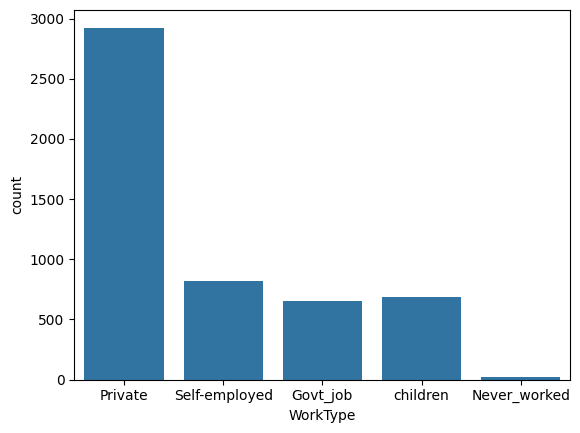

In [34]:
sns.countplot(x='WorkType', data=df)
plt.show()

In [35]:
df['WorkType'] = df['WorkType'].replace('children', 'Never_worked')

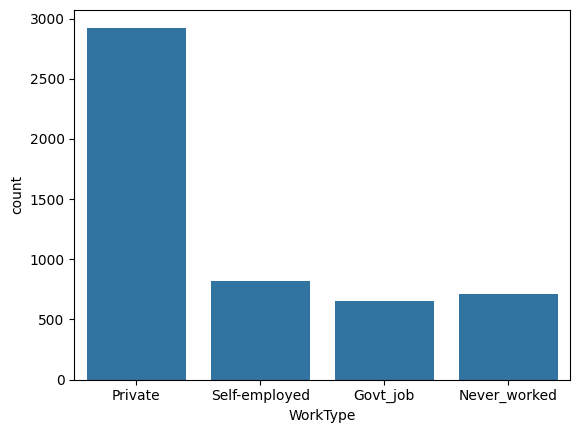

In [36]:
sns.countplot(x='WorkType', data=df)
plt.show()

In [37]:
#from the result above, the number of Never worked has gone up after the change

In [38]:
#Examining the smoking status column
selected_column = df.SmokingStatus
selected_column

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: SmokingStatus, Length: 5110, dtype: object

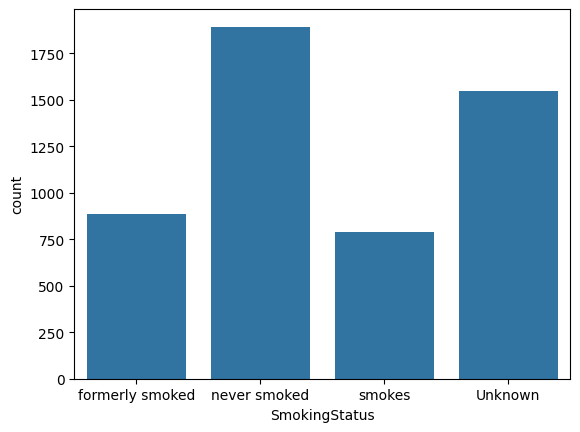

In [39]:
sns.countplot(x='SmokingStatus', data=df)
plt.show()

In [40]:
#There seems to a high percetahe of Unknown smoking status here.
#Unknown was changed to neversmoked

df['SmokingStatus'] = df['SmokingStatus'].replace('Unknown', 'never smoked')

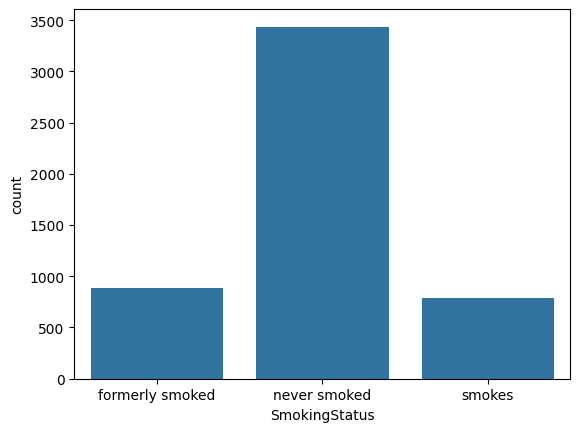

In [41]:
sns.countplot(x='SmokingStatus', data=df)
plt.show()

In [42]:
#Examining the Age column
selected_column = df.Age
selected_column

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: Age, Length: 5110, dtype: int64

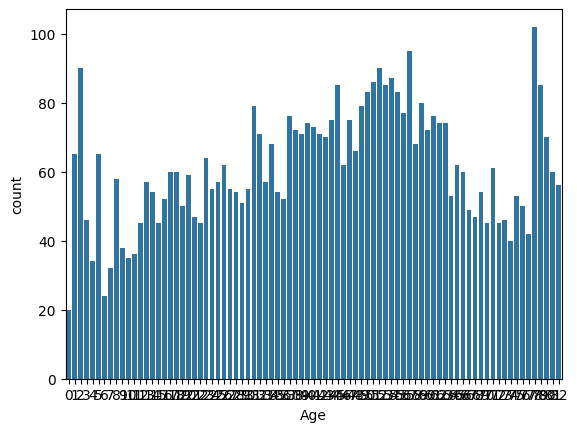

In [43]:
sns.countplot(x='Age', data=df)
plt.show()


In [44]:
 #Convert age values to integers, which will remove the decimal part
df['Age'] = df['Age'].astype(int)


In [45]:
#some of the input there are decmal so I change to interger

In [46]:
#i display to see the new changes to Age coloumn
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel        BMI    SmokingStatus  Stroke  
0            Urban               228.69  36.600000  formerly smoked       1  
1            Rural               202.21  28.893237     never smoked       1  
2            Rural               105.92  32.500000     never smoked       1  
3            Urban               171.23  34.400000           smokes       1  
4            Rural               174.12  24.000000     never smoked       1  
...            ...                  ...        ...              ...     ...  
5105         Urban                83.75  28.893237     never smoked       0  
5106         Urban               125.20  40.000000     never smoked       0  
5107         Rural                82.99  30.600000     never smoked       0  
5108         Rural               166.29  25.600000  formerly smoked       0  
5109         Urban                85.28  26.200000     never smoked       0  

[5110 rows x 11 columns]

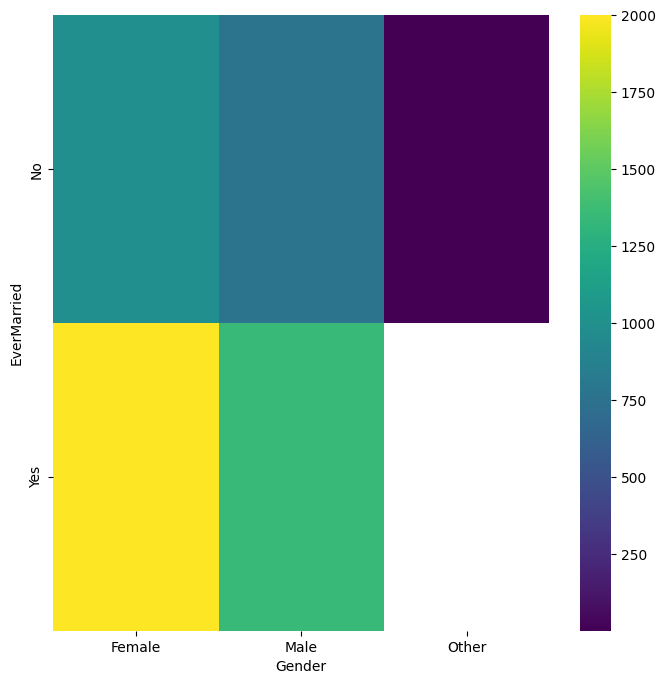

In [47]:
# @title gender vs ever_married

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EverMarried'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('EverMarried')

In [48]:
#age coloumn is not showing whole mubers

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

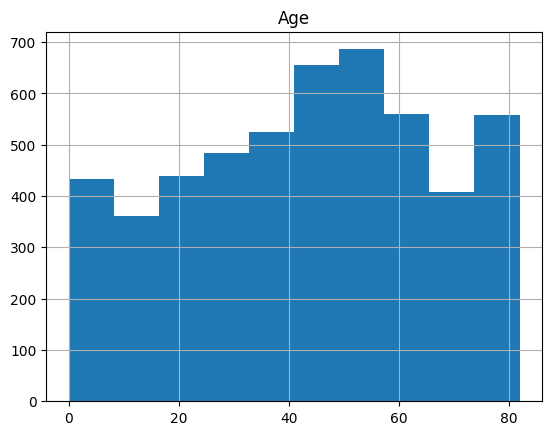

In [49]:
df.hist(column='Age')

In [50]:
#Examining the Gender column
selected_column = df.Gender
selected_column

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: Gender, Length: 5110, dtype: object

In [51]:
Gender_counts = df['Gender'].value_counts()
print(Gender_counts)

Gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


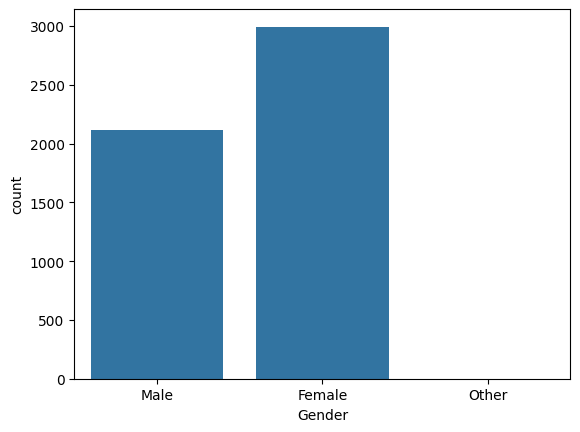

In [52]:
sns.countplot(x='Gender', data=df)
plt.show()

In [53]:
# this outcome indicate that we have some other type of gender but it is not clear what specific gender it is . Given that we only have 2 scientic gender, also since you cannot quatify the other
#or classify it , i will remove it to avoid it


In [54]:
df = df[df['Gender'] != 'Other']

In [55]:
df.shape

(5109, 11)

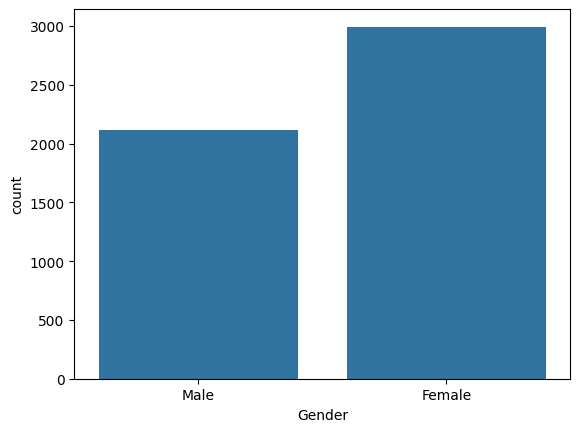

In [56]:
sns.countplot(x='Gender', data=df)
plt.show()

**VISUALISATION CONT..**

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

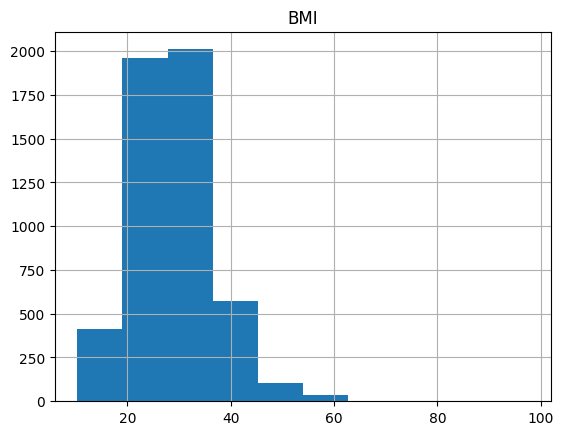

In [57]:
df.hist(column='BMI')

array([[<Axes: title={'center': 'Hypertension'}>]], dtype=object)

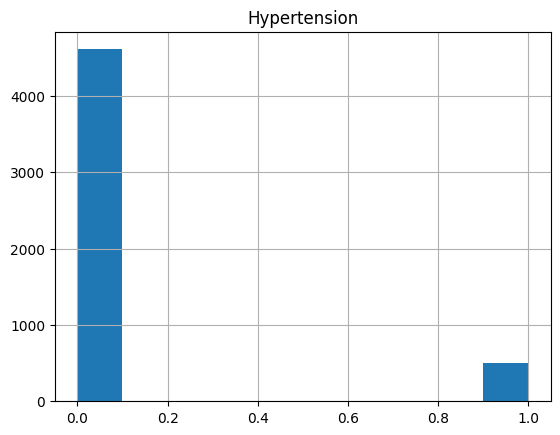

In [58]:
df.hist(column='Hypertension')

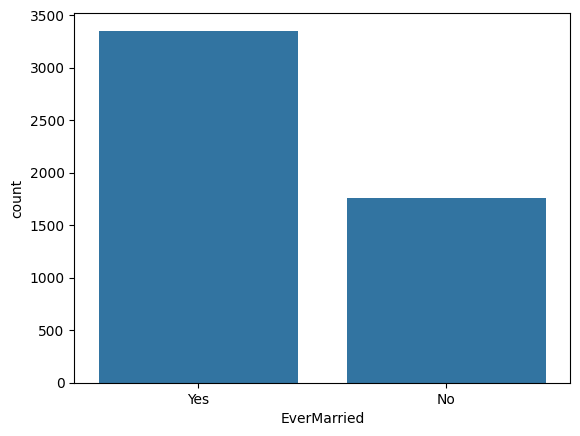

In [59]:

sns.countplot(x='EverMarried', data=df)
plt.show()


In [60]:
#ever married output

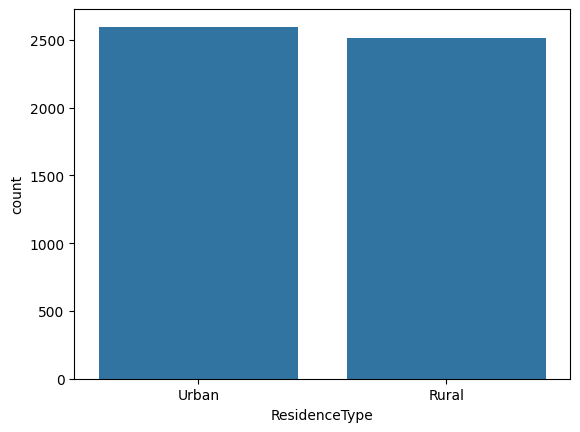

In [61]:
sns.countplot(x='ResidenceType', data=df)
plt.show()

array([[<Axes: title={'center': 'AverageGlucoseLevel'}>]], dtype=object)

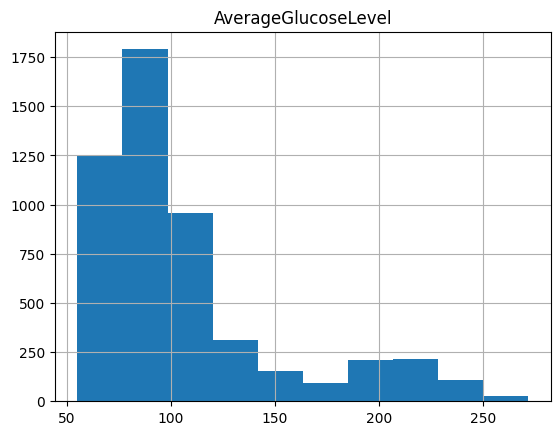

In [62]:
df.hist(column='AverageGlucoseLevel')

array([[<Axes: title={'center': 'HeartDisease'}>]], dtype=object)

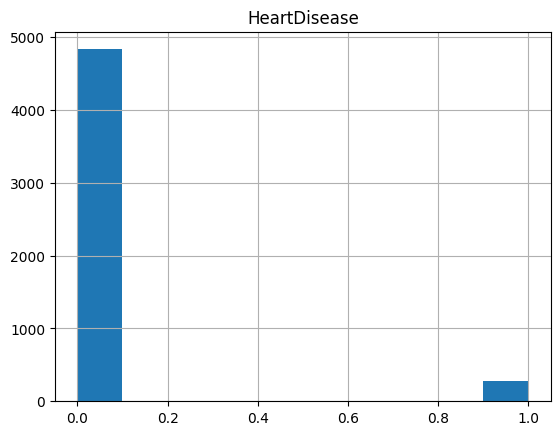

In [63]:
df.hist(column='HeartDisease')

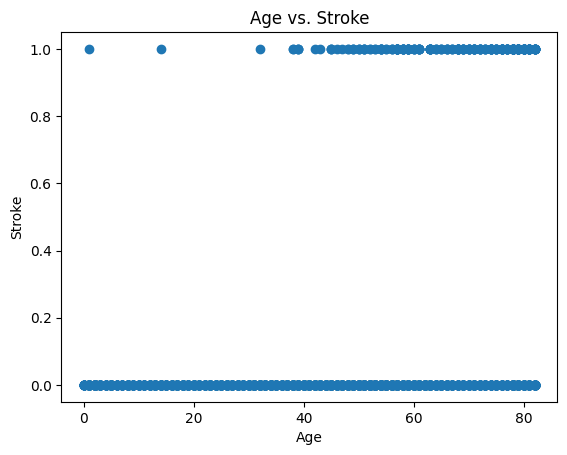

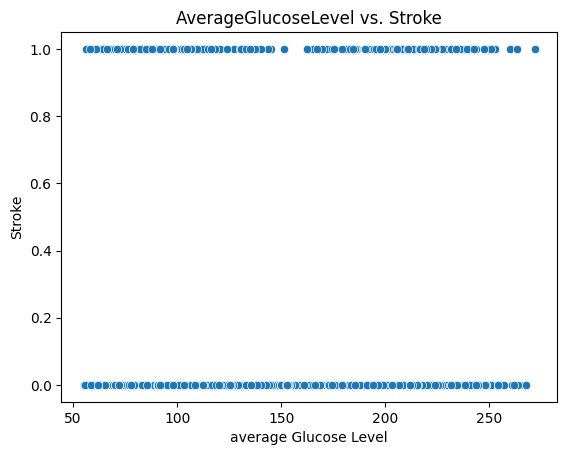

In [64]:
# Example of creating a scatter plot using Matplotlib
plt.scatter(df['Age'], df['Stroke'])
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.title('Age vs. Stroke')
plt.show()

# Example of creating a scatter plot using Seaborn
sns.scatterplot(x='AverageGlucoseLevel', y='Stroke', data=df)
plt.xlabel('average Glucose Level')
plt.ylabel('Stroke')
plt.title('AverageGlucoseLevel vs. Stroke')
plt.show()

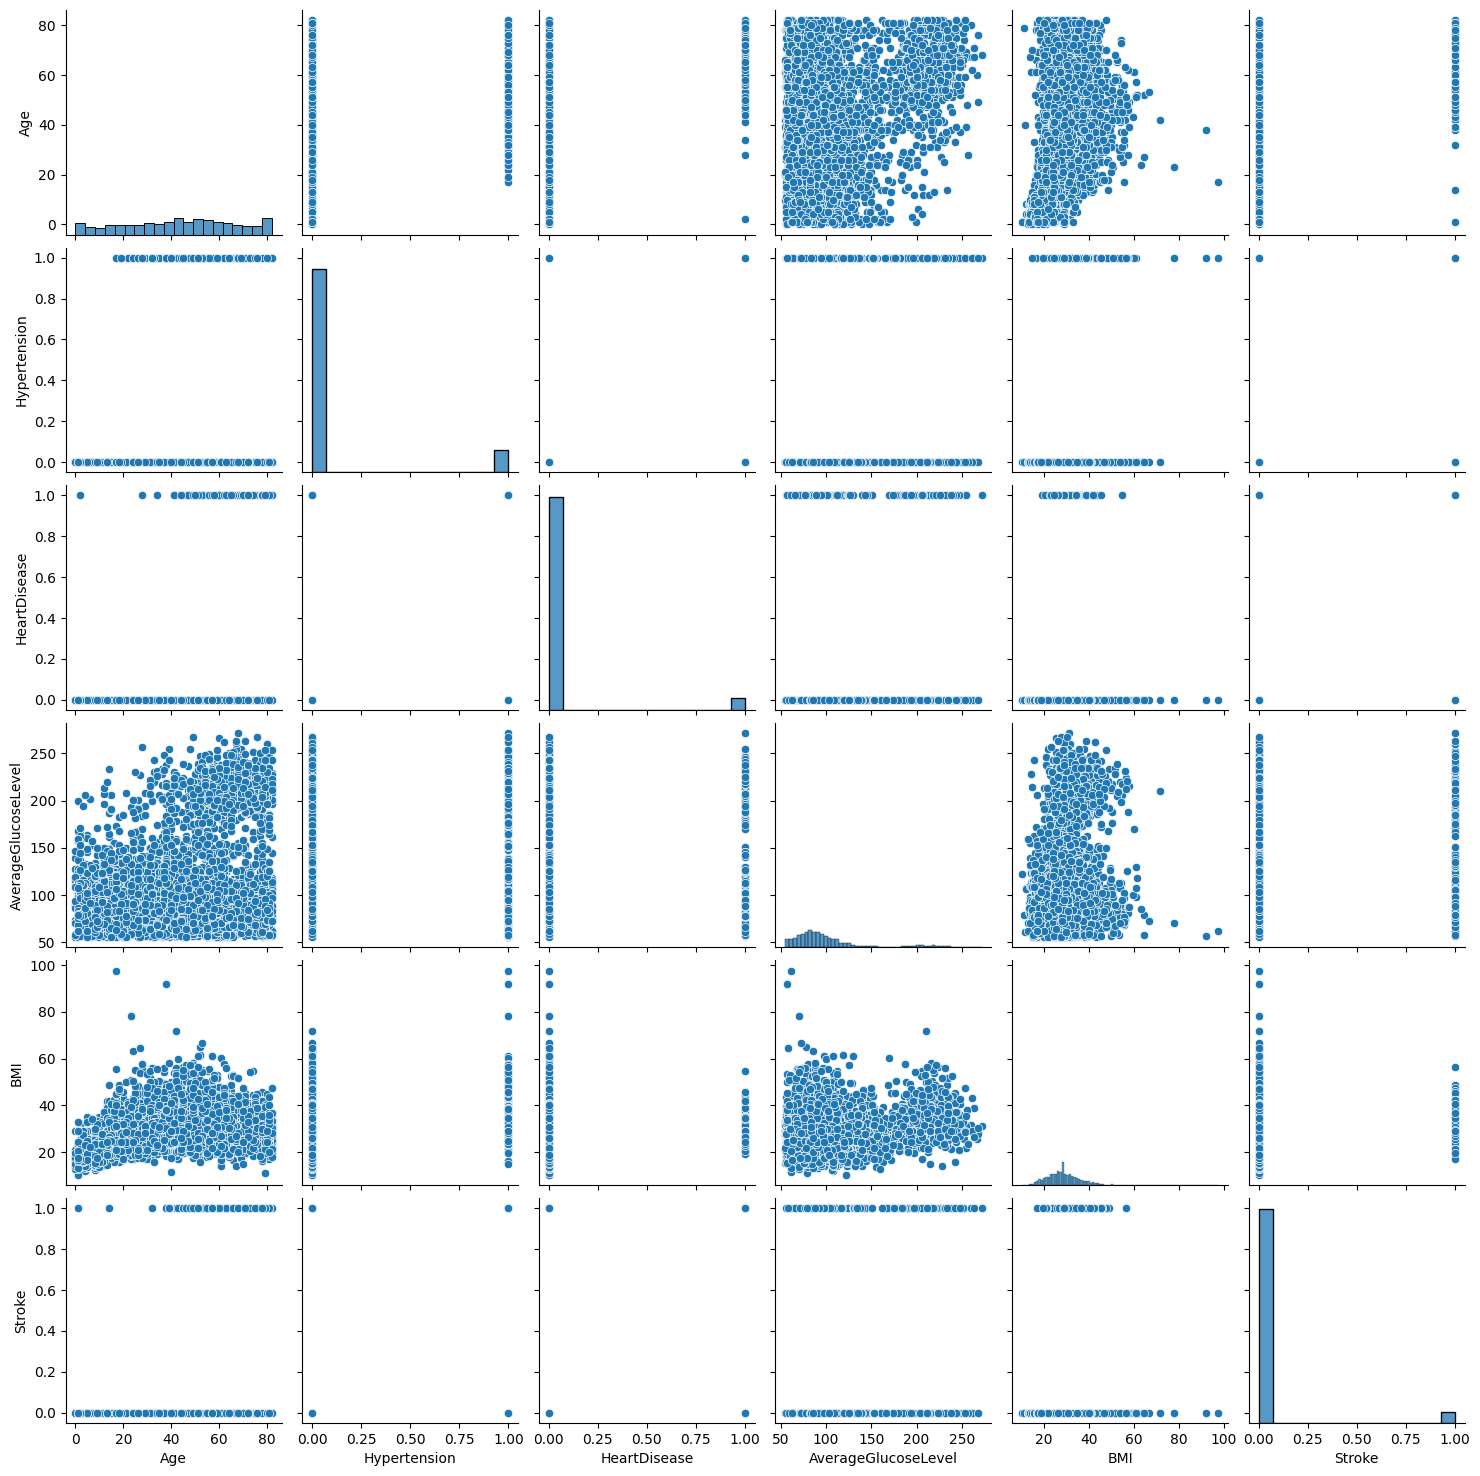

In [65]:
#Summary
sns.pairplot(df)


In [66]:
 pip install numpy

In [67]:
# Round up 'BMI' values
df['BMI'] = np.ceil(df['BMI'])

# Revert back to original format
pd.options.display.float_format = None

<ipython-input-67-24e8ea888791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = np.ceil(df['BMI'])


In [68]:
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            Urban               228.69  37.0  formerly smoked       1  
1            Rural               202.21  29.0     never smoked       1  
2            Rural               105.92  33.0     never smoked       1  
3            Urban               171.23  35.0           smokes       1  
4            Rural               174.12  24.0     never smoked       1  
...            ...                  ...   ...              ...     ...  
5105         Urban                83.75  29.0     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  31.0     never smoked       0  
5108         Rural               166.29  26.0  formerly smoked       0  
5109         Urban                85.28  27.0     never smoked       0  

[5109 rows x 11 columns]

**ENCODING** **CATERGORICAL** **COLUMNS** **VALUES** **INTO** **NUMERICAL**

In [69]:
label_encoder = LabelEncoder()

# Encode categorical columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EverMarried'] = label_encoder.fit_transform(df['EverMarried'])
df['WorkType'] = label_encoder.fit_transform(df['WorkType'])
df['SmokingStatus'] = label_encoder.fit_transform(df['SmokingStatus'])
df['ResidenceType'] = label_encoder.fit_transform(df['ResidenceType'])

In [70]:
display(df)

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0          1   67             0             1            1         2   
1          0   61             0             0            1         3   
2          1   80             0             1            1         2   
3          0   49             0             0            1         2   
4          0   79             1             0            1         3   
...      ...  ...           ...           ...          ...       ...   
5105       0   80             1             0            1         2   
5106       0   81             0             0            1         3   
5107       0   35             0             0            1         3   
5108       1   51             0             0            1         2   
5109       0   44             0             0            1         0   

      ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0                 1               228.69  37.0              0       1  
1                 0               202.21  29.0              1       1  
2                 0               105.92  33.0              1       1  
3                 1               171.23  35.0              2       1  
4                 0               174.12  24.0              1       1  
...             ...                  ...   ...            ...     ...  
5105              1                83.75  29.0              1       0  
5106              1               125.20  40.0              1       0  
5107              0                82.99  31.0              1       0  
5108              0               166.29  26.0              0       0  
5109              1                85.28  27.0              1       0  

[5109 rows x 11 columns]

In [71]:
df.corr()

Gender       Age  Hypertension  HeartDisease  \
Gender               1.000000 -0.027688      0.021223      0.085685   
Age                 -0.027688  1.000000      0.276366      0.263776   
Hypertension         0.021223  0.276366      1.000000      0.108292   
HeartDisease         0.085685  0.263776      0.108292      1.000000   
EverMarried         -0.030171  0.679082      0.164187      0.114601   
WorkType            -0.034040  0.292743      0.087444      0.072644   
ResidenceType       -0.006105  0.014059     -0.007980      0.003045   
AverageGlucoseLevel  0.054722  0.238331      0.174540      0.161907   
BMI                 -0.026122  0.324661      0.159565      0.037612   
SmokingStatus       -0.021312 -0.110806     -0.019315     -0.016452   
Stroke               0.009081  0.245225      0.127891      0.134905   

                     EverMarried  WorkType  ResidenceType  \
Gender                 -0.030171 -0.034040      -0.006105   
Age                     0.679082  0.292743       0.014059   
Hypertension            0.164187  0.087444      -0.007980   
HeartDisease            0.114601  0.072644       0.003045   
EverMarried             1.000000  0.198428       0.005988   
WorkType                0.198428  1.000000      -0.006395   
ResidenceType           0.005988 -0.006395       1.000000   
AverageGlucoseLevel     0.155329  0.056907      -0.004783   
BMI                     0.335432  0.144691      -0.000890   
SmokingStatus          -0.047306 -0.027276       0.011823   
Stroke                  0.108299  0.058139       0.015415   

                     AverageGlucoseLevel       BMI  SmokingStatus    Stroke  
Gender                          0.054722 -0.026122      -0.021312  0.009081  
Age                             0.238331  0.324661      -0.110806  0.245225  
Hypertension                    0.174540  0.159565      -0.019315  0.127891  
HeartDisease                    0.161907  0.037612      -0.016452  0.134905  
EverMarried                     0.155329  0.335432      -0.047306  0.108299  
WorkType                        0.056907  0.144691      -0.027276  0.058139  
ResidenceType                  -0.004783 -0.000890       0.011823  0.015415  
AverageGlucoseLevel             1.000000  0.168101      -0.033646  0.131991  
BMI                             0.168101  1.000000      -0.015266  0.037254  
SmokingStatus                  -0.033646 -0.015266       1.000000 -0.037144  
Stroke                          0.131991  0.037254      -0.037144  1.000000

In [72]:
#he correlation coefficient between 'age' and 'hypertension' is 0.254545, shows a positive correlation, but not very strong.
#The correlation coefficient between 'heart_disease' and 'bmi' is -0.003140, suggesting a very weak negative correlation.
#The correlation coefficient between 'avg_glucose_level' and 'stroke' is 0.129297, indicating a positive correlation, though not very strong.

In [73]:
df.shape

(5109, 11)

In [74]:
df.to_csv(r'/Stroke.csv', index=False)
pima = pd.read_csv('/Stroke.csv')

In [75]:
pima.head()

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0              1               228.69  37.0              0       1  
1              0               202.21  29.0              1       1  
2              0               105.92  33.0              1       1  
3              1               171.23  35.0              2       1  
4              0               174.12  24.0              1       1

**Split** **up** **the** **dataset** **into** **features** **and** **target**

In [76]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age', 'Hypertension', 'HeartDisease', 'EverMarried', 'WorkType', 'ResidenceType', 'AverageGlucoseLevel', 'BMI', 'SmokingStatus']
X = pima[feature_cols] # Features
y = pima.Stroke # Target variable

X.head()

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  
0              1               228.69  37.0              0  
1              0               202.21  29.0              1  
2              0               105.92  33.0              1  
3              1               171.23  35.0              2  
4              0               174.12  24.0              1

In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Stroke, dtype: int64

**Split dataset into Features(X) and  target(y)**

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=0)

**Standard Scaler**

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

**Building** **and** **training** **the** **model**

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

**KNN Classifier**

In [81]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train_new, y_train)


KNeighborsClassifier(n_neighbors=3)

**Testing** **KNN** **Model**

In [82]:
#show first 5 model predictions on the test data
knn.predict(X_test_new)[0:5]

array([0, 0, 0, 0, 0])

In [83]:
#check accuracy of our model on the test data
knn.score(X_test_new, y_test)



0.9432485322896281

In [84]:
prediction= knn.predict(X_test_new)

print( classification_report(y_test, prediction))
print("Accuracy Score: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.20      0.05      0.08        75

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533

Accuracy Score:  0.9432485322896281


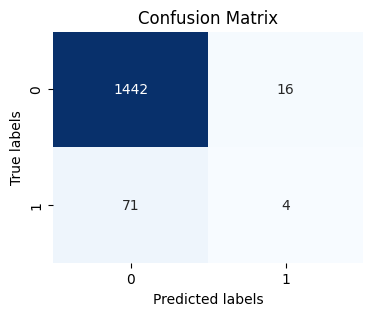

In [85]:
# Creating the confusion matrix
prediction= knn.predict(X_test_new)
cm = confusion_matrix(y_test, prediction)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [86]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Decision Tree Model**

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Classifer
clf = clf.fit(X_train_new,y_train)

***Testing Decision Tree ***

In [88]:
#show first 5 model predictions on the test data
clf.predict(X_test_new)[0:5]

array([0, 0, 0, 0, 0])

In [89]:
#check accuracy of our model on the test data
clf.score(X_test_new, y_test)

0.9021526418786693

In [90]:
prediction_clf= clf.predict(X_test_new)

print( classification_report(y_test, prediction_clf))
print("Accuracy Score: ", accuracy_score(y_test, prediction_clf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.14      0.19      0.16        75

    accuracy                           0.90      1533
   macro avg       0.55      0.56      0.55      1533
weighted avg       0.92      0.90      0.91      1533

Accuracy Score:  0.9021526418786693


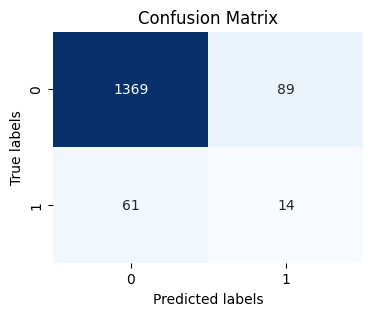

In [91]:
# Creating the confusion matrix
prediction_clf= clf.predict(X_test_new)
cm = confusion_matrix(y_test, prediction_clf)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#Well, you got a classification rate of 91%, which is considered good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

In [93]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)


In [94]:
#Optimising Decision Tree Performance

In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_new,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9510763209393346


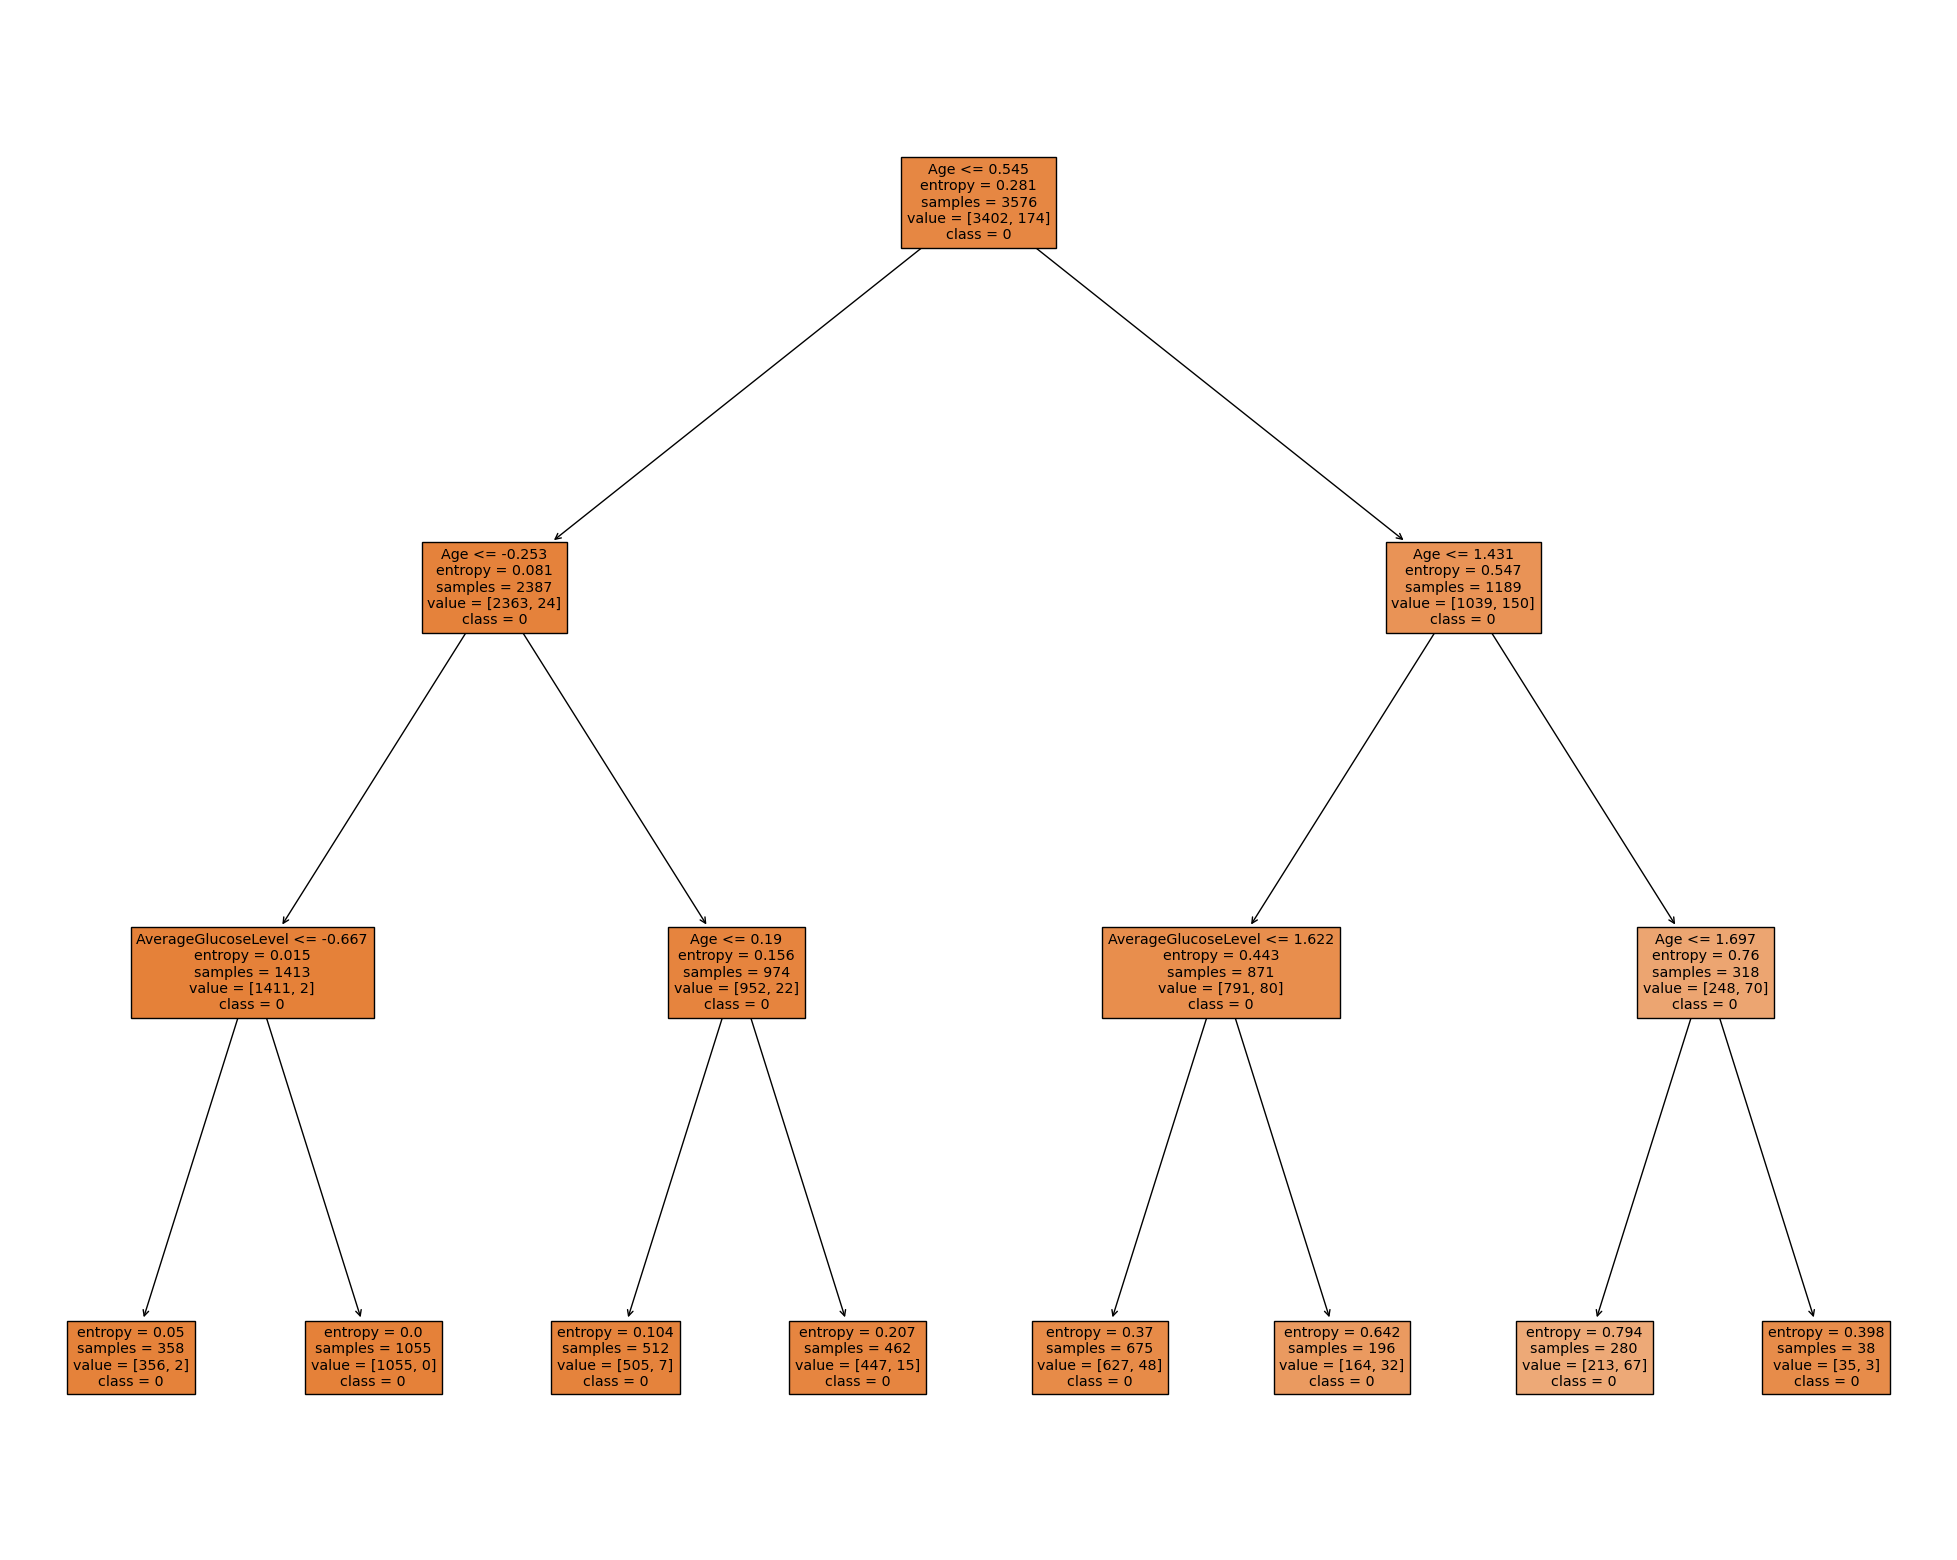

In [96]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
DT_Graph_pruned = tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'],filled=True)


In [97]:
#Visualising the Confusion Matrix of the Pruned Decision Tree

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


0.9510763209393346


array([[1458,    0],
       [  75,    0]])

**Logistic** **Reegression**

In [99]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log = LogisticRegression()
log.fit(X_train_new, y_train)

LogisticRegression()

***Testing Log Reg ***

In [100]:
#Model Evaluation using Confusion Matrix
log.predict(X_test_new)[0:5]

array([0, 0, 0, 0, 0])

In [101]:
log.score(X_test_new, y_test)

0.9510763209393346

In [102]:
prediction_log= log.predict(X_test_new)

print( classification_report(y_test, prediction_log))
print("Accuracy Score: ", accuracy_score(y_test, prediction_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

Accuracy Score:  0.9510763209393346


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


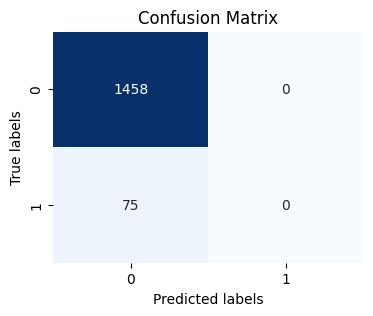

In [103]:
# Creating the confusion matrix
prediction_log= log.predict(X_test_new)
cm = confusion_matrix(y_test, prediction_log)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes Model**

In [104]:
# Naive Base
from sklearn.naive_bayes import GaussianNB

In [105]:
#NB classifier
Naive_bayes = GaussianNB()
Naive_bayes.fit (X_train_new, y_train) #Fitting

GaussianNB()

**Testing Naive Base**

In [106]:
#show first 5 model predictions on the test data
Naive_bayes.predict(X_test_new)[0:5]


array([0, 0, 0, 0, 0])

In [107]:
Naive_bayes.score(X_test_new, y_test)

0.8695368558382257

In [108]:
prediction_Naive_bayes= Naive_bayes.predict(X_test_new)

print( classification_report(y_test, prediction_Naive_bayes))
print("Accuracy Score: ", accuracy_score(y_test, prediction_Naive_bayes))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1458
           1       0.17      0.41      0.24        75

    accuracy                           0.87      1533
   macro avg       0.57      0.65      0.58      1533
weighted avg       0.93      0.87      0.89      1533

Accuracy Score:  0.8695368558382257


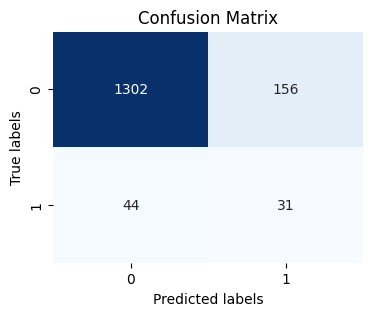

In [109]:
# Creating the confusion matrix
prediction_Naive_bayes= Naive_bayes.predict(X_test_new)
cm = confusion_matrix(y_test, prediction_Naive_bayes)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Support Vector Classifier**

In [110]:
# Support Vector
from sklearn.svm import SVC

In [111]:
# SVM classifier
svc = SVC()
svc.fit(X_train_new, y_train) # Fiting the model

SVC()

**Testing SVC**

In [112]:
#show first 5 model predictions on the test data
svc.predict(X_test_new)[0:5]

array([0, 0, 0, 0, 0])

In [113]:
svc.score(X_test_new, y_test)

0.9510763209393346

In [114]:
prediction_svc= svc.predict(X_test_new)

print( classification_report(y_test, prediction_svc))
print("Accuracy Score: ", accuracy_score(y_test, prediction_svc))



              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

Accuracy Score:  0.9510763209393346


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


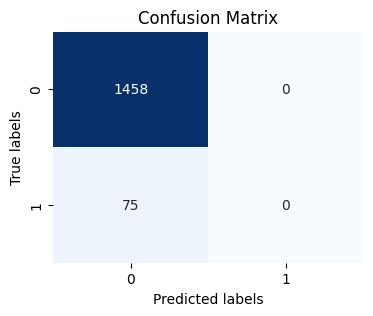

In [115]:
# Creating the confusion matrix
prediction_svc= svc.predict(X_test_new)
cm = confusion_matrix(y_test, prediction_svc)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
X_train_new.shape

(3576, 10)

In [117]:
X_test_new.shape

(1533, 10)

In [118]:
y_train.value_counts()

Stroke
0    3402
1     174
Name: count, dtype: int64

**Handling Imbalanced Data with SMOTE**

In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay

In [120]:
# To handle imbalanced data
smote = SMOTE(random_state=1)

X1_train, y1_train = smote.fit_resample(X_train_new, y_train)
print('Resampled dataset shape %s' % Counter(y1_train))


Resampled dataset shape Counter({0: 3402, 1: 3402})


In [121]:
y1_train.value_counts()

Stroke
0    3402
1    3402
Name: count, dtype: int64

**KNN with SMOTE**

In [122]:
knn_new = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn_new.fit(X1_train, y1_train)
prediction_k= knn_new.predict(X_test_new)

print( classification_report(y_test, prediction_k))
print("Accuracy Score: ", accuracy_score(y_test, prediction_k))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1458
           1       0.09      0.24      0.13        75

    accuracy                           0.85      1533
   macro avg       0.52      0.56      0.52      1533
weighted avg       0.92      0.85      0.88      1533

Accuracy Score:  0.8473581213307241


In [123]:
knn_new.score(X_test_new, y_test)

0.8473581213307241

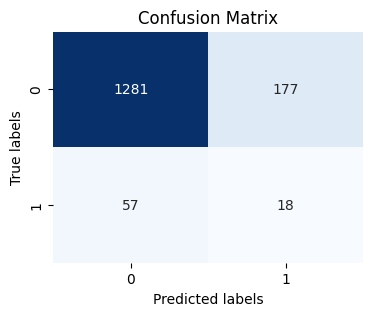

In [124]:
# Creating the confusion matrix
prediction_k= knn_new.predict(X_test_new)
cm = confusion_matrix(y_test, prediction_k)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [125]:
# Calculate the precision score
precision = precision_score(y_test, prediction_k)
print('Precision score of the KNN model:', precision)

# Calculate the recall score
recall = recall_score(y_test, prediction_k)
print('Recall score of the KNN model:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, prediction_k)
print('F1 score of the KNN model:', f1)

Precision score of the KNN model: 0.09230769230769231
Recall score of the KNN model: 0.24
F1 score of the KNN model: 0.13333333333333336


**Decision Tree WITH SMOTE**

In [126]:
# Create Decision Tree classifer object
clf_new = DecisionTreeClassifier()
clf_new.fit(X1_train, y1_train)
clf2_prediction= clf_new.predict(X_test_new)

print( classification_report(y_test, clf2_prediction))
print("Accuracy Score: ", accuracy_score(y_test, clf2_prediction))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1458
           1       0.08      0.15      0.10        75

    accuracy                           0.87      1533
   macro avg       0.51      0.53      0.52      1533
weighted avg       0.91      0.87      0.89      1533

Accuracy Score:  0.8708414872798435


In [127]:
clf_new.score(X_test_new, y_test)

0.8708414872798435

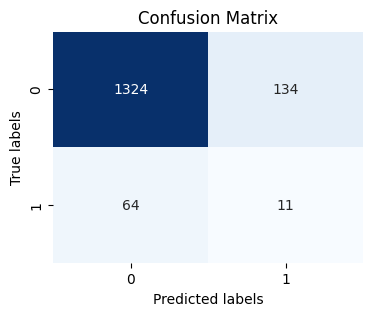

In [128]:
# Creating the confusion matrix
clf2_prediction= clf_new.predict(X_test_new)
cm = confusion_matrix(y_test, clf2_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [129]:
# from google.colab import drive
# drive.mount('/content/drive')

In [130]:
# Calculate the precision score
precision = precision_score(y_test, clf2_prediction)
print('Precision score of the DTree model:', precision)

# Calculate the recall score
recall = recall_score(y_test, clf2_prediction)
print('Recall score of the DTree model:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, clf2_prediction)
print('F1 score of the Dtree model:', f1)

Precision score of the DTree model: 0.07586206896551724
Recall score of the DTree model: 0.14666666666666667
F1 score of the Dtree model: 0.1


**Log Regression with SMOTE**

In [131]:
logreg_new = LogisticRegression()
logreg_new.fit(X1_train, y1_train)
log_prediction= logreg_new.predict(X_test_new)

print( classification_report(y_test, log_prediction))
print("Accuracy Score: ", accuracy_score(y_test, log_prediction))


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1458
           1       0.13      0.73      0.21        75

    accuracy                           0.74      1533
   macro avg       0.55      0.73      0.53      1533
weighted avg       0.94      0.74      0.81      1533

Accuracy Score:  0.7364644487932159


In [132]:
logreg_new.score(X_test_new, y_test)

0.7364644487932159

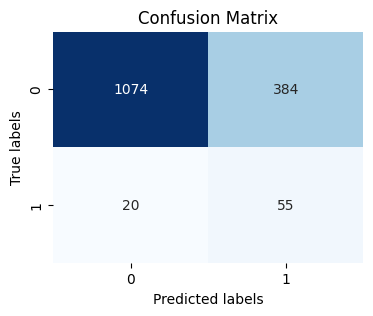

In [133]:
# Creating the confusion matrix
log_prediction= logreg_new.predict(X_test_new)
cm = confusion_matrix(y_test, log_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [134]:
# Calculate the precision score
precision = precision_score(y_test, log_prediction)
print('Precision score of the Log Reg model:', precision)

# Calculate the recall score
recall = recall_score(y_test, log_prediction)
print('Recall score of the Log Reg model:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, log_prediction)
print('F1 score of the Log Reg model:', f1)

Precision score of the Log Reg model: 0.1252847380410023
Recall score of the Log Reg model: 0.7333333333333333
F1 score of the Log Reg model: 0.21400778210116733


**Naive Bayes with SMOTE**

In [135]:
#NB classifier with SMOTE
NB = GaussianNB()
NB.fit (X1_train, y1_train) #Fitting

NB_prediction= NB.predict(X_test_new)

print( classification_report(y_test, NB_prediction))
print("Accuracy Score: ", accuracy_score(y_test, NB_prediction))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1458
           1       0.13      0.76      0.22        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.74      0.81      1533

Accuracy Score:  0.7364644487932159


In [136]:
NB.score(X_test_new, y_test)

0.7364644487932159

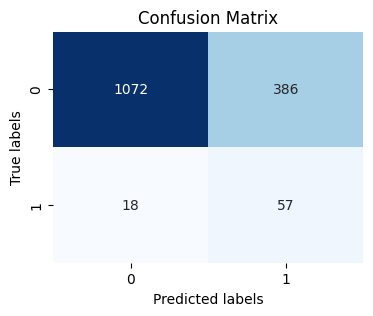

In [137]:
# Creating the confusion matrix
NB_prediction= NB.predict(X_test_new)
cm = confusion_matrix(y_test, NB_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [138]:
# Calculate the precision score
precision = precision_score(y_test, NB_prediction)
print('Precision score of the Naive Bayes model:', precision)

# Calculate the recall score
recall = recall_score(y_test, NB_prediction)
print('Recall score of the Naive Bayes model:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, NB_prediction)
print('F1 score of the Naive Bayes model:', f1)

Precision score of the Naive Bayes model: 0.12866817155756208
Recall score of the Naive Bayes model: 0.76
F1 score of the Naive Bayes model: 0.22007722007722008


**Support Vector Classifier with SMOTE**

In [139]:
# SVM classifier
svc_new = SVC()
svc_new.fit(X1_train, y1_train) # Fiting the model
svm_prediction= svc_new.predict(X_test_new)

print( classification_report(y_test, svm_prediction))
print("Accuracy Score: ", accuracy_score(y_test, svm_prediction))



              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1458
           1       0.12      0.52      0.19        75

    accuracy                           0.79      1533
   macro avg       0.54      0.66      0.53      1533
weighted avg       0.93      0.79      0.84      1533

Accuracy Score:  0.7853881278538812


In [140]:
svc_new.score(X_test_new, y_test)

0.7853881278538812

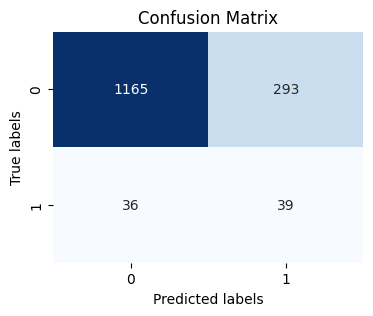

In [141]:
# Creating the confusion matrix
svm_prediction= svc_new.predict(X_test_new)
cm = confusion_matrix(y_test, svm_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [142]:
# Calculate the precision score
precision = precision_score(y_test, svm_prediction)
print('Precision score of the SVC model:', precision)

# Calculate the recall score
recall = recall_score(y_test, svm_prediction)
print('Recall score of the SVC model:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, svm_prediction)
print('F1 score of the SVC  model:', f1)

Precision score of the SVC model: 0.11746987951807229
Recall score of the SVC model: 0.52
F1 score of the SVC  model: 0.19164619164619165


In [143]:
# Assuming your dataset is loaded into a DataFrame called 'df'
class_distribution = df['Stroke'].value_counts()
print(class_distribution)

Stroke
0    4860
1     249
Name: count, dtype: int64


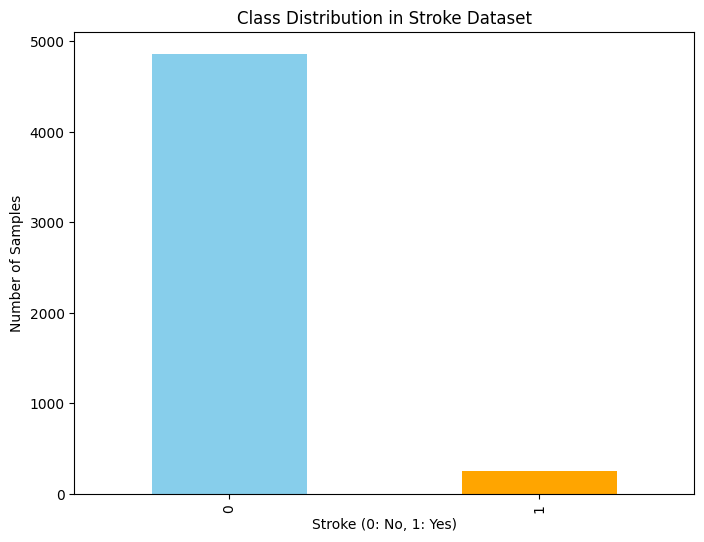

In [144]:
import matplotlib.pyplot as plt

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Stroke Dataset')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Number of Samples')
plt.show()

In [145]:
# recall score of all models

print('Recall score of the KNN model:', recall_score(y_test, prediction_k))
print('Recall score of the DTree model:', recall_score(y_test, clf2_prediction))
print('Recall score of the Log Reg model:', recall_score(y_test, log_prediction))
print('Recall score of the Naive Bayes model:', recall_score(y_test, NB_prediction))
print('Recall score of the SVC model:', recall_score(y_test, svm_prediction))


Recall score of the KNN model: 0.24
Recall score of the DTree model: 0.14666666666666667
Recall score of the Log Reg model: 0.7333333333333333
Recall score of the Naive Bayes model: 0.76
Recall score of the SVC model: 0.52


**recall score of all models**

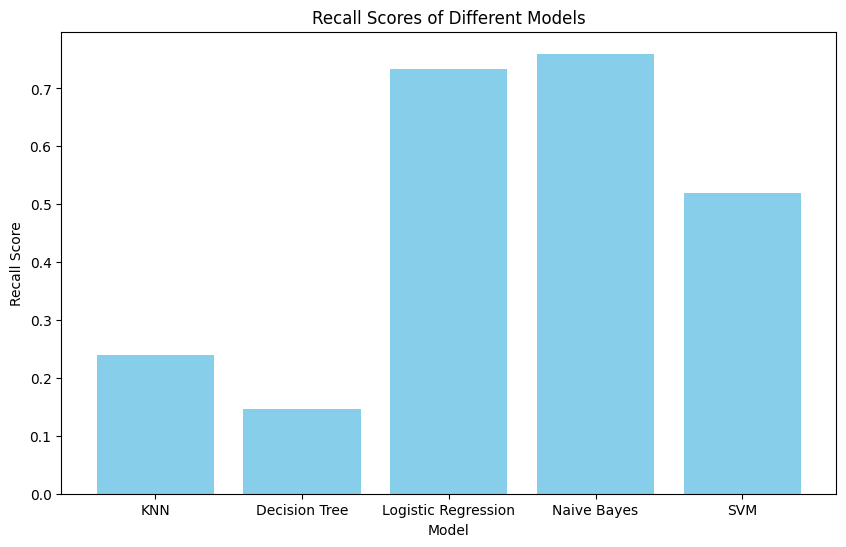

In [146]:
#  show recall score of all models in graphical form

# Calculate recall scores for all models
recall_knn = recall_score(y_test, prediction_k)
recall_dtree = recall_score(y_test, clf2_prediction)
recall_logreg = recall_score(y_test, log_prediction)
recall_nb = recall_score(y_test, NB_prediction)
recall_svm = recall_score(y_test, svm_prediction)

# Create a list of model names and recall scores
model_names = ["KNN", "Decision Tree", "Logistic Regression", "Naive Bayes", "SVM"]
recall_scores = [recall_knn, recall_dtree, recall_logreg, recall_nb, recall_svm]

# Create a bar chart to display the recall scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, recall_scores, color='skyblue')
plt.title('Recall Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.show()


**F1 score of all models**

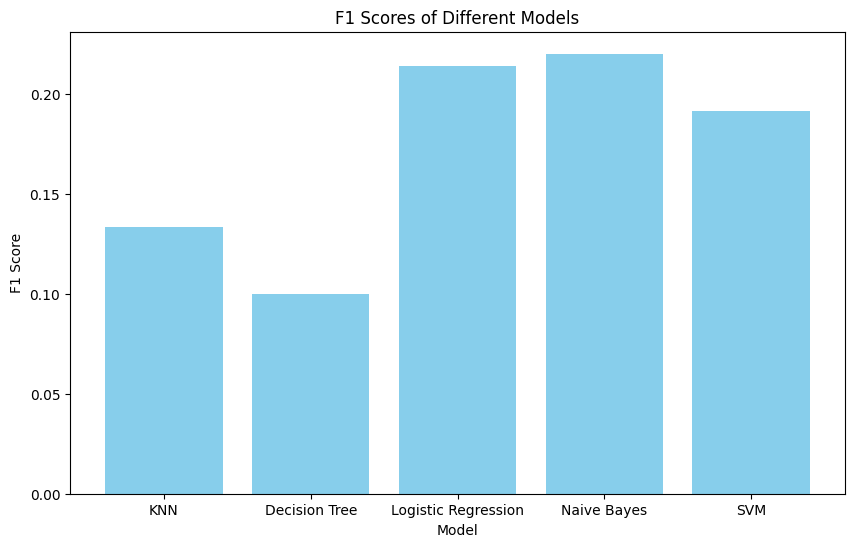

In [147]:
#   show F1 score of all models ?

# Calculate f1 scores for all models
f1_knn = f1_score(y_test, prediction_k)
f1_dtree = f1_score(y_test, clf2_prediction)
f1_logreg = f1_score(y_test, log_prediction)
f1_nb = f1_score(y_test, NB_prediction)
f1_svm = f1_score(y_test, svm_prediction)

# Create a list of model names and f1 scores
model_names = ["KNN", "Decision Tree", "Logistic Regression", "Naive Bayes", "SVM"]
f1_scores = [f1_knn, f1_dtree, f1_logreg, f1_nb, f1_svm]

# Create a bar chart to display the f1 scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='skyblue')
plt.title('F1 Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()


**Precision  score of all models**

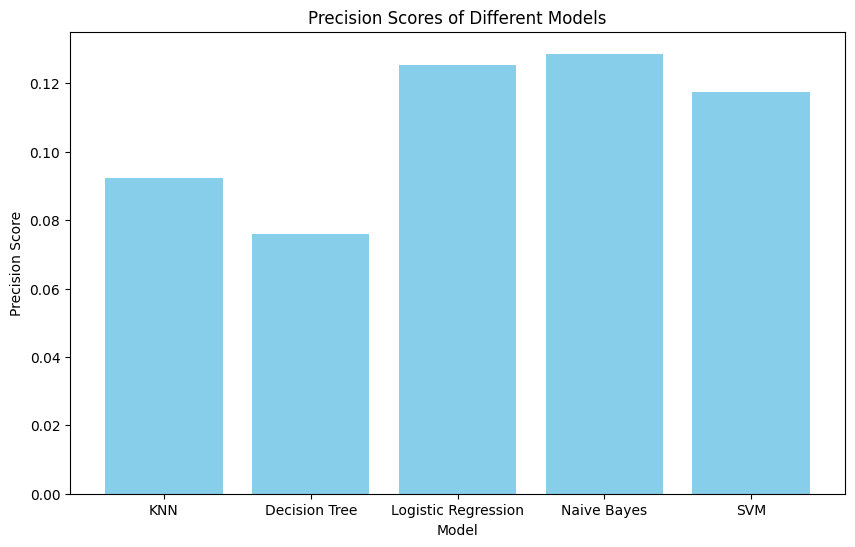

In [148]:
# prompt: how to  show Precision  score of all models  ?

# Calculate precision scores for all models
precision_knn = precision_score(y_test, prediction_k)
precision_dtree = precision_score(y_test, clf2_prediction)
precision_logreg = precision_score(y_test, log_prediction)
precision_nb = precision_score(y_test, NB_prediction)
precision_svm = precision_score(y_test, svm_prediction)

# Create a list of model names and precision scores
model_names = ["KNN", "Decision Tree", "Logistic Regression", "Naive Bayes", "SVM"]
precision_scores = [precision_knn, precision_dtree, precision_logreg, precision_nb, precision_svm]

# Create a bar chart to display the precision scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, precision_scores, color='skyblue')
plt.title('Precision Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.show()


**Saving the Model**

In [151]:
# save the naive bayes model

import joblib
joblib.dump(NB, 'Naive_bayes.pkl')


['Naive_bayes.pkl']

**Load the Model**

In [152]:
# load the model

loaded_model = joblib.load('Naive_bayes.pkl')


In [153]:
loaded_model

GaussianNB()

**Model** **Prediction**

In [155]:
#  input some values to predict output

# input values
input_data = (0, 130, 0, 0, 1, 2, 0, 105, 30, 0)

# convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
standardized_data = scaler.transform(input_data_reshaped)

# predict the output
prediction = loaded_model.predict(standardized_data)

print(prediction)

if (prediction[0] == 0):
  print('The person is not likely to get stroke')
else:
  print('The person is likely to get stroke')

[0]
The person is not likely to get stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
